<a href="https://colab.research.google.com/github/MarkovChainMC/PINN/blob/main/PINN_for_Poisson_and_Analytical_Check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

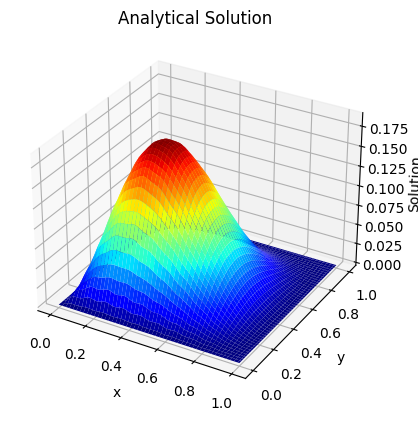

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the domain boundaries
x_min, x_max = 0.0, 1.0
y_min, y_max = 0.0, 1.0

# Define the number of modes for the eigenfunction expansion
m_max, n_max = 20, 20

# Define the length of the domain along x and y directions
L_x, L_y = x_max - x_min, y_max - y_min

# Define the source function (you can modify this according to your problem)
def source(x, y):
    return np.sin(np.pi * x) * np.sin(np.pi * y)

# Compute the analytical solution
def analytical_solution(x, y, m_max, n_max):
    u = np.zeros_like(x)
    for m in range(1, m_max + 1):
        for n in range(1, n_max + 1):
            eigenvalue = (m * np.pi / L_x) ** 2 + (n * np.pi / L_y) ** 2
            eigenfunction = np.sin(m * np.pi * x / L_x) * np.sin(n * np.pi * y / L_y)
            coefficient = 4 / (L_x * L_y) * source(x, y) / eigenvalue
            u += coefficient * eigenfunction
    return u

# Create a meshgrid for the x and y coordinates
x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Compute the analytical solution on the grid
u_analytical = analytical_solution(x_grid, y_grid, m_max, n_max)

# Create the 3D plot using plot_surface from matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_grid, y_grid, u_analytical, cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Solution')
ax.set_title('Analytical Solution')

plt.show()
